In [2]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas as pd#Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

import pickle

In [3]:
sectors = ['Information Technology', 'Financials', 'Energy', 'Materials']

In [11]:
sector_idx = int(input("your sector index: "))
assert sector_idx >= 0 and sector_idx < len(sectors)
sector = sectors[sector_idx]
sec_wv_path = f'../Data/MDA_2010_2020/{sector}_wv.pkl'
this_wv = pickle.load(open(sec_wv_path, 'rb'))

your sector index:  0


In [4]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector


def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

def makeDF(model, word_list, dim):
    RU = []
    for word in word_list:
        RU.append(
            sklearn.metrics.pairwise.cosine_similarity(this_wv[word].reshape(1, -1), dim.reshape(1, -1))[
                0][0])
    df = pd.DataFrame({'Risk_Uncertainty': RU}, index=word_list)
    return df

def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim, title):
    ax.set_frame_on(False)
    ax.set_title(title, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0.3, 1.1 * df[dim][i]+0.02), color = colors[i], alpha = 0.8, fontsize = 15)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

In [13]:

Key_Words = ['political', 'regulatory', 'financial', 'interest', 'rate', 'country',\
             'social', 'environmental', 'operational', 'management', 'legal', \
             'competition', 'economic', 'compliance', 'security','fraud', \
             'operational', 'operation', 'competition', ]

In [14]:
dfs = []
for sec in sectors:
    sec_wv_path = f'../Data/MDA_2010_2020/{sec}_wv.pkl'
    this_wv = pickle.load(open(sec_wv_path, 'rb'))
    Risk_Uncertainty = dimension(this_wv, ['risk', 'risks', 'risky', 'risking'], ['uncertainty', 'uncertainties', 'uncertain'])
    KWdf = makeDF(this_wv, Key_Words, Risk_Uncertainty) 
    dfs.append((sec, KWdf))
    

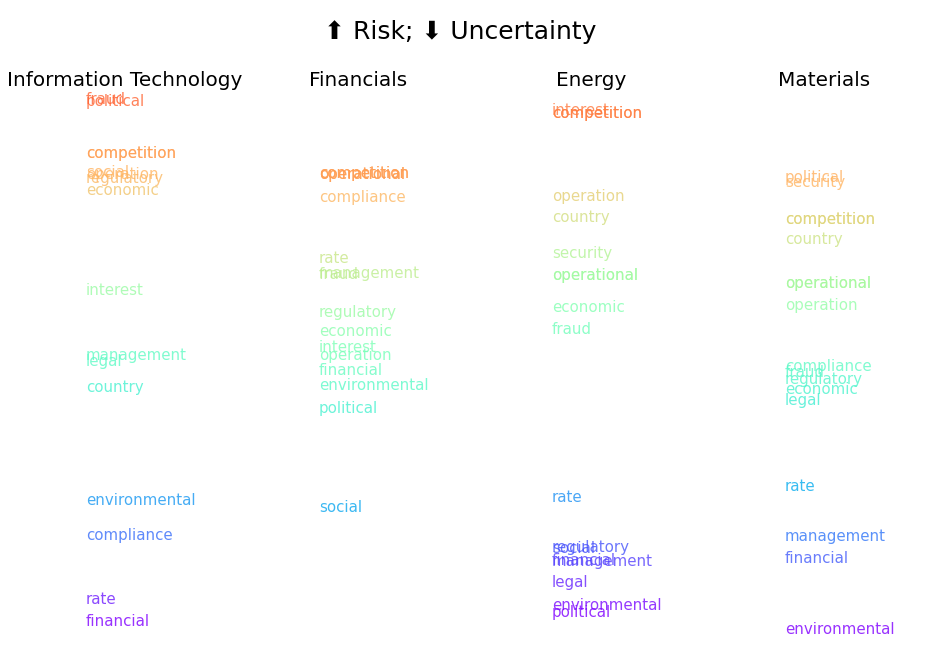

In [15]:
fig = plt.figure(figsize = (16,10))
fig.suptitle("⬆️ Risk; ⬇️ Uncertainty",fontsize = 25)
for idx, (sec, curDf) in enumerate(dfs):
    ax = fig.add_subplot(141 + idx)
    PlotDimension(ax, curDf, "Risk_Uncertainty", sec)

plt.savefig('../Data/Projections/Risk_Uncertainty.png')

In [9]:
Key_Words = ["employment", "employee", "employees", "product", "products", "people", \
             "management", "operation", "system", "goods", "goal", "vision", "value",\
             "customers", "clients"]

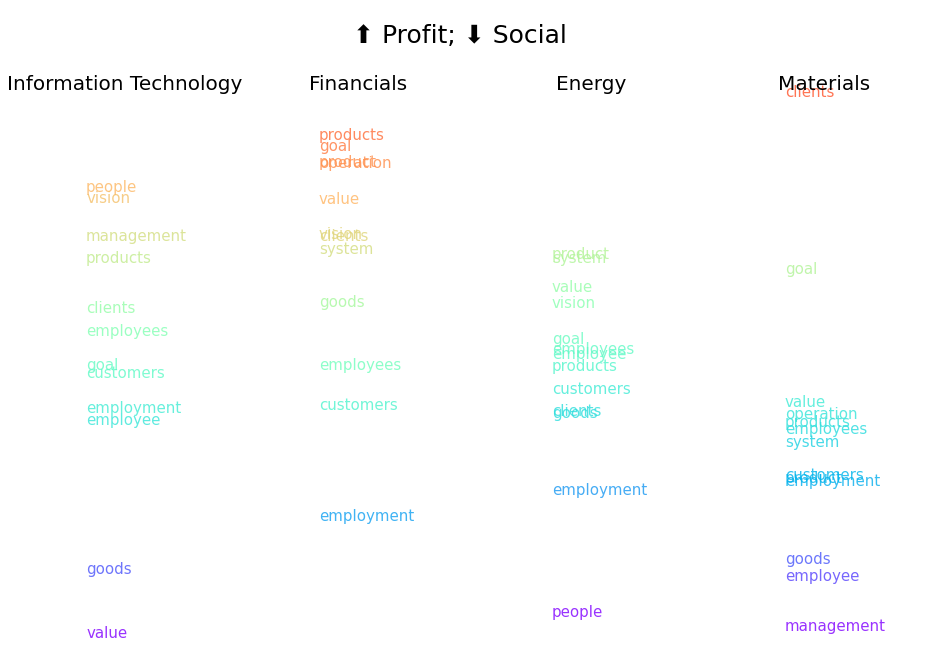

In [12]:
dfs = []
for sec in sectors:
    sec_wv_path = f'../Data/MDA_2010_2020/{sec}_wv.pkl'
    this_wv = pickle.load(open(sec_wv_path, 'rb'))
    Profit_Social = dimension(this_wv, \
                                 ["revenue", "income", "profit", "growth", "boom", "interest"],\
                                 ["social", "environment", "governance", "responsibility", "diversity"])
    KWdf = makeDF(this_wv, Key_Words, Risk_Uncertainty) 
    dfs.append((sec, KWdf))
    
fig = plt.figure(figsize = (16,10))
fig.suptitle("⬆️ Profit; ⬇️ Social",fontsize = 25)
for idx, (sec, curDf) in enumerate(dfs):
    ax = fig.add_subplot(141 + idx)
    PlotDimension(ax, curDf, "Risk_Uncertainty", sec)

plt.savefig('../Data/Projections/Profit_Social.png')